In [18]:
import numpy as np
import pandas as pd
import scanpy as sc

In [19]:
import anndata
fname = "../data_scbasset_tutorial/buen_ad_sc.h5ad"
ad = anndata.read_h5ad(fname)
cellanno = ad.obs.copy()
cellanno.head()

,cell_barcode,label,batch
x,,,
BM1077-CLP-Frozen-160106-13,BM1077-CLP-Frozen-160106-13,CLP,BM1077
BM1077-CLP-Frozen-160106-14,BM1077-CLP-Frozen-160106-14,CLP,BM1077
BM1077-CLP-Frozen-160106-2,BM1077-CLP-Frozen-160106-2,CLP,BM1077
BM1077-CLP-Frozen-160106-21,BM1077-CLP-Frozen-160106-21,CLP,BM1077
BM1077-CLP-Frozen-160106-27,BM1077-CLP-Frozen-160106-27,CLP,BM1077


In [20]:
import torch
d = torch.load("Log/chekc_model.pth")
d.keys()

/tmp/ipykernel_2946225/4112703141.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load("Log/chekc_model.pth")


odict_keys(['conv.0.weight', 'conv.0.bias', 'conv.2.fn.0.weight', 'conv.2.fn.0.bias', 'conv.5.weight', 'conv.5.bias', 'conv.7.fn.0.weight', 'conv.7.fn.0.bias', 'conv.10.weight', 'conv.10.bias', 'conv.12.fn.0.weight', 'conv.12.fn.0.bias', 'conv.15.weight', 'conv.15.bias', 'conv.17.fn.0.weight', 'conv.17.fn.0.bias', 'linear.0.weight', 'linear.0.bias', 'linear.2.weight'])

In [21]:
cell_weight = d['linear.2.weight'].cpu().data.numpy()
cell_weight.shape

(2034, 128)

In [22]:
ad.obsm['projection'] = cell_weight
sc.pp.neighbors(ad, use_rep='projection')

/share/home/zhanglab/user/lijiaqi/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/tools/_tsne.py:113: UserWarning: In previous versions of scanpy, calling tsne with n_jobs > 1 would use MulticoreTSNE. Now this uses the scikit-learn version of TSNE by default. If you'd like the old behaviour (which is deprecated), pass 'use_fast_tsne=True'. Note, MulticoreTSNE is not actually faster anymore.
  warnings.warn(
/share/home/zhanglab/user/lijiaqi/anaconda3/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


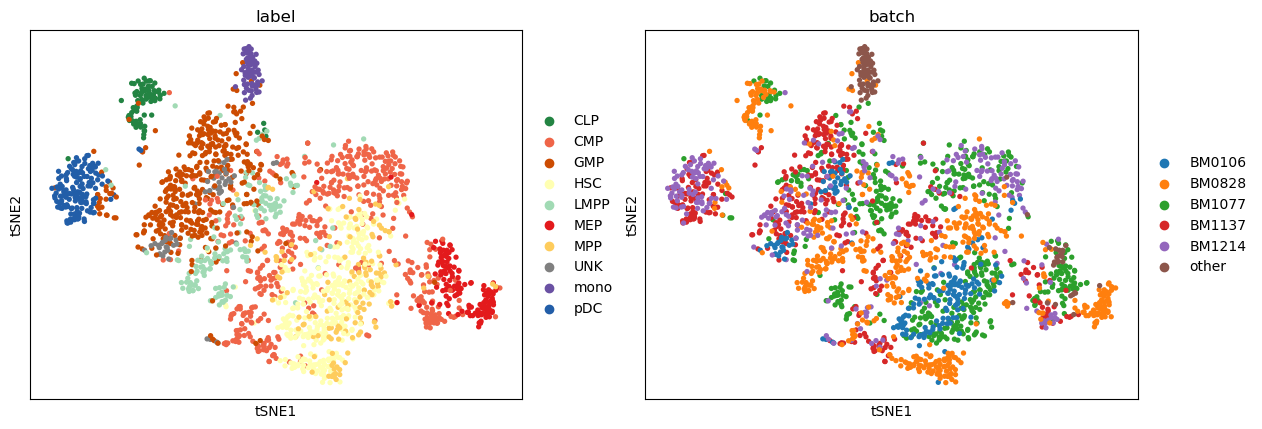

In [43]:
sc.tl.tsne(ad, use_rep='projection', n_jobs=8)
sc.pl.tsne(ad, color=['label', 'batch'])